In [21]:
%matplotlib inline

In [38]:
import urllib
d = urllib.request.urlopen('https://drive.google.com/uc?export=download&id=0B3q2OAggveHfWXVYWHdsR05CaU0').read()
d = d.decode('utf-8')
d = d.split('\n')

In [40]:
d = []
for i in range(int(len(lines)/6)):
    row = [lines[i*6+j].strip() for j in range(6)]
    d.append(row)
d = pd.DataFrame(d, columns=['Facility', 'Street', 'City', 'Score', 'Date', 'Type'])
d['Score'] = d['Score'].astype(np.float64)
d.head()

,Facility,Street,City,Score,Date,Type
0,167 RAW,289 EAST BAY,CHARLESTON,98,3/20/2015,F
1,167 RAW,289 EAST BAY,CHARLESTON,100,3/30/2015,F
2,3 MATADORS TEQUILERIA,2447 ASHLEY RIVER ROAD,CHARLESTON,98,7/1/2015,R
3,3 MATADORS TEQUILERIA,2447 ASHLEY RIVER ROAD,CHARLESTON,100,11/21/2014,F
4,34 WEST THEATER COMPANY,200 MEETING ST STE 100,CHARLESTON,100,9/10/2015,R


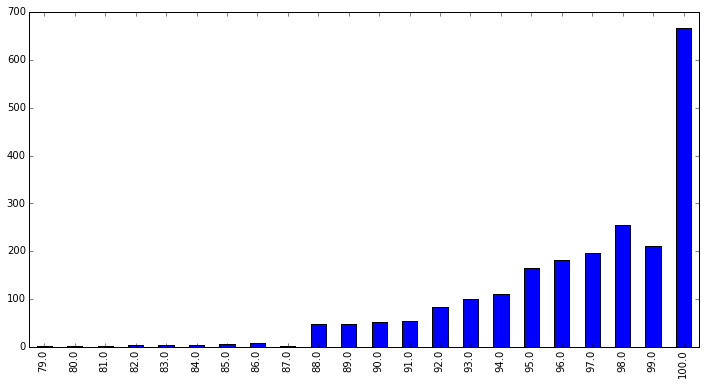

In [52]:
d['Score'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))

In [51]:
d[d['Score'] <= 87]['Facility'].unique()

array(['A-1 CHINA SUPER BUFFET', "ANDOLINI'S PIZZA",
       "BIG BILLY'S BURGER JOINT", "BOONE'S BAR & GRILL", "BRECK'S",
       "BROWN'S COURT BAKERY", 'CHINA FUN LLC', 'CO', "HOPSING'S",
       'HUDDLE HOUSE #152', 'IHOP', "JAVANINO'S PIZZERIA",
       'KING STREET GRILLE', 'KING STREET PUBLIC HOUSE',
       'LA CARRETA MEXICAN RESTAURANT', 'LA HACIENDA GRILL',
       'LANA RESTAURANT & BAR', 'MARINA VARIETY STORE REST INC',
       "MCDONALD'S #10431", "MCDONALD'S #16540", "MCDONALD'S #28877",
       "MCDONALD'S #4491", 'MIDTOWN BAR & GRILL', 'ODYSSEY RESTAURANT',
       'PANDA PALACE', 'PANE E VINO', 'PARK CAFE',
       'POLLO TROPICAL PERUVIAN CUISIN', 'RED ORCHIDS CHINA BISTRO',
       'RESTAURANT & TORTILLERIA', 'SONIC DRIVE IN OF JAMES ISLAND',
       'SUPER WOK', 'TASTY THAI AND SUSHI',
       'WINGS NEIGHBORHOOD BAR & GRILL', 'ZIA TAQUERIA'], dtype=object)

In [60]:
d[d['Facility'].str.contains('MONDO')]

,Facility,Street,City,Score,Date,Type
1372,MONDO'S DELITE,915 FOLLY ROAD,CHARLESTON,100,10/9/2014,F
1373,MONDO'S DELITE,915 FOLLY ROAD,CHARLESTON,94,10/1/2014,R


In [41]:
d.sort('Score').head(30)

,Facility,Street,City,Score,Date,Type
230,BOONE'S BAR & GRILL,345 KING ST.,CHARLESTON,79,10/21/2015,R
433,CHINA FUN LLC,3025 ASHLEY TOWN CNT DR #101,CHARLESTON,79,8/6/2015,R
1283,MARINA VARIETY STORE REST INC,17 LOCKWOOD BLVD,CHARLESTON,80,8/5/2014,R
1138,KING STREET PUBLIC HOUSE,549 KING STREET,CHARLESTON,80,5/18/2015,R
256,BROWN'S COURT BAKERY,199 ST PHILP ST,CHARLESTON,81,10/15/2014,R
1471,ODYSSEY RESTAURANT,915 FOLLY RD SUITE M,CHARLESTON,81,1/12/2015,R
1648,RESTAURANT & TORTILLERIA,6585 DORCHESTER RD,NORTH CHARLESTON,82,8/26/2015,R
1586,POLLO TROPICAL PERUVIAN CUISIN,5335 DORCHESTER RD,NORTH CHARLESTON,82,8/18/2015,R
967,HOPSING'S,630 SKYLARK DRIVE SUITE N2,CHARLESTON,82,7/16/2015,R
1986,TASTY THAI AND SUSHI,350 KING ST,CHARLESTON,82,7/27/2015,R
